<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [20]:
# TODO - during class, but please help!
# Coke or Pepsi experiement
# This will be represented as a binomial random variable
# We want a list of 30 observations (sample size n=30)
# 0 = Likes Pepsi
# 1 = Likes Coke

# Start by generating rando data

import random

#dir(random.randint)

random.seed(10) # Only randomizes once
sample = [random.randint(0,1) for _ in range(30)]
print(sample)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [21]:
import pandas as pd

df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


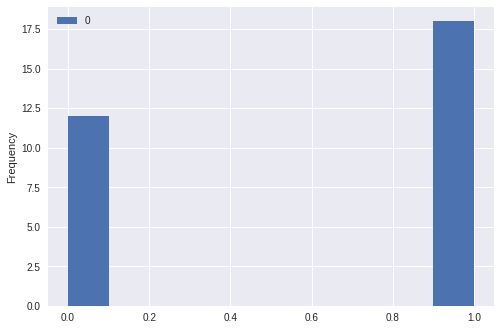

In [22]:
df.plot.hist();

In [23]:
# Now with confidence!

import scipy
#help(scipy.stats.ttest_1samp)
scipy.stats.ttest_1samp(df[0], 0.5)

Ttest_1sampResult(statistic=1.0992421631894096, pvalue=0.2807046476465548)

In [24]:
# Let's try to calculate the test statistics by scratch
# We need the sample standard error
df[0].std()

0.4982728791224399

In [27]:
from math import sqrt
df[0].std() / sqrt(30)

0.09097176522946843

In [26]:
# one-liner from Chris
(df[0].mean() - 0.5) / (df[0].std() / (30 ** (1/2)))

1.0992421631894094

In [0]:
# Let's make a reusable function
def std(sample, mean):
  std = 0
  for obs in sample:
    std+= (obs - mean)**2
  return (std / (len(sample) -1)) ** (1/2)

def calculate_t_stat(sample, null_hyp):
  sample_mean = sum(sample) / len(sample)
  #print(sample_mean)
  sample_std = std(sample, sample_mean)
  #print(sample_std)
  return (sample_mean - null_hyp) / (sample_std / (len(sample) ** (1/2)))

In [58]:
calculate_t_stat(survey_data, 0.5)

2.364321853156195

In [43]:
pd.DataFrame(survey_data).describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [54]:
# Let's test it
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

# Try this with both scipy and ours
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [60]:

t = scipy.stats.t(len(survey_data))
t.cdf(calculate_t_stat(survey_data, 0.5))

0.9890062713232346

In [0]:
# For random seed = 42
# P-value is very small -- we reject null hypothesis
# Negative test statistic -- means it's favoring Pepsi

# For random seed = 10
# P-value is large enough -- we accept null hypothesis
#  test statistic barely favoring coke

In [0]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base
# Put the entire above experiment in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p-value holds

In [0]:
# Degress of freedom = sample size

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None)

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [76]:
df.shape

(435, 17)

In [75]:
df = df.rename(columns={0: "party", 
                   1: "handicapped_infants", 
                   2: "water_project_cost_sharing", 
                   3: "budget_resolution", 
                   4: "physician_fee_freeze",
                   5: "el_salvador_aid",
                   6: "religious_groups_in_schools",
                   7: "anti_satellite_test_ban",
                   8: "aid_to_nicaraguan_contras",
                   9: "mx_missile",
                   10: "immigration",
                   11: "synfuels_corporation_cutback",
                   12: "education_spending",
                   13: "superfund_right_to_sue",
                   14: "crime",
                   15: "duty_free_exports",
                   16: "export_act_south_africa"})
df.head()        

,party,handicapped_infants,water_project_cost_sharing,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [80]:
df['party'].value_counts(normalize=True)

democrat      0.613793
republican    0.386207
Name: party, dtype: float64

In [0]:
# Creating 2 separate dataframes for repubs and dems
repubs = df[df['party'] == 'republican']
dems = df[df['party'] == 'democrat']

In [87]:
repubs.sample(5)

,party,handicapped_infants,water_project_cost_sharing,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_act_south_africa
416,republican,y,y,n,y,y,y,n,n,n,y,n,n,y,y,n,y
295,republican,n,y,n,y,y,y,?,?,n,y,n,y,?,?,?,?
195,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,n,?
146,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
35,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


In [88]:
dems.sample(5)

,party,handicapped_infants,water_project_cost_sharing,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_act_south_africa
326,democrat,y,y,n,y,n,n,y,y,y,n,y,n,n,y,n,y
381,democrat,y,y,y,n,y,y,y,y,y,y,y,n,y,y,n,?
366,democrat,y,n,y,n,n,n,y,y,n,y,y,n,n,n,n,?
394,democrat,y,y,?,?,?,y,n,n,n,n,y,n,y,n,n,y
386,democrat,n,?,y,n,y,y,n,y,n,n,y,n,n,n,n,?


In [89]:
dems.shape, repubs.shape

((267, 17), (168, 17))

In [223]:
import numpy as np

dems_handicapped = dems['handicapped_infants'].replace('?', np.nan)
dems_handicapped.dropna()
dems_handicapped = dems_handicapped.replace({'y': 1, 'n': 0})
dems_handicapped.value_counts(normalize=True)

1.0    0.604651
0.0    0.395349
Name: handicapped_infants, dtype: float64

In [222]:
repubs_handicapped = repubs['handicapped_infants'].replace('?', np.nan)
repubs_handicapped.dropna()
repubs_handicapped = repubs_handicapped.replace({'y': 1, 'n': 0})
repubs_handicapped.value_counts(normalize=True)

0.0    0.812121
1.0    0.187879
Name: handicapped_infants, dtype: float64

In [224]:
dems_water = dems['water_project_cost_sharing'].replace('?', np.nan)
dems_water.dropna()
dems_water = dems_water.replace({'y': 1, 'n': 0})
dems_water.value_counts(normalize=True)

1.0    0.502092
0.0    0.497908
Name: water_project_cost_sharing, dtype: float64

In [225]:
repubs_water = repubs['water_project_cost_sharing'].replace('?', np.nan)
repubs_water.dropna()
repubs_water = repubs_water.replace({'y': 1, 'n': 0})
repubs_water.value_counts(normalize=True)

1.0    0.506757
0.0    0.493243
Name: water_project_cost_sharing, dtype: float64

In [226]:
dems_budget = dems['budget_resolution'].replace('?', np.nan)
dems_budget.dropna()
dems_budget = dems_budget.replace({'y': 1, 'n': 0})
dems_budget.value_counts(normalize=True)

1.0    0.888462
0.0    0.111538
Name: budget_resolution, dtype: float64

In [227]:
repubs_budget = repubs['budget_resolution'].replace('?', np.nan)
repubs_budget.dropna()
repubs_budget = repubs_budget.replace({'y': 1, 'n': 0})
repubs_budget.value_counts(normalize=True)

0.0    0.865854
1.0    0.134146
Name: budget_resolution, dtype: float64

In [228]:
dems_physician = dems['physician_fee_freeze'].replace('?', np.nan)
dems_physician.dropna()
dems_physician = dems_physician.replace({'y': 1, 'n': 0})
dems_physician.value_counts(normalize=True)

0.0    0.945946
1.0    0.054054
Name: physician_fee_freeze, dtype: float64

In [229]:
repubs_physician = repubs['physician_fee_freeze'].replace('?', np.nan)
repubs_physician.dropna()
repubs_physician = repubs_physician.replace({'y': 1, 'n': 0})
repubs_physician.value_counts(normalize=True)

1.0    0.987879
0.0    0.012121
Name: physician_fee_freeze, dtype: float64

In [230]:
dems_el_salvador = dems['el_salvador_aid'].replace('?', np.nan)
dems_el_salvador.dropna()
dems_el_salvador = dems_el_salvador.replace({'y': 1, 'n': 0})
dems_el_salvador.value_counts(normalize=True)

0.0    0.784314
1.0    0.215686
Name: el_salvador_aid, dtype: float64

In [231]:
repubs_el_salvador = repubs['el_salvador_aid'].replace('?', np.nan)
repubs_el_salvador.dropna()
repubs_el_salvador = repubs_el_salvador.replace({'y': 1, 'n': 0})
repubs_el_salvador.value_counts(normalize=True)

1.0    0.951515
0.0    0.048485
Name: el_salvador_aid, dtype: float64

In [233]:
dems_religious = dems['religious_groups_in_schools'].replace('?', np.nan)
dems_religious.dropna()
dems_religious = dems_religious.replace({'y': 1, 'n': 0})
dems_religious.value_counts(normalize=True)

0.0    0.523256
1.0    0.476744
Name: religious_groups_in_schools, dtype: float64

In [235]:
repubs_religious = repubs['religious_groups_in_schools'].replace('?', np.nan)
repubs_religious.dropna()
repubs_religious = repubs_religious.replace({'y': 1, 'n': 0})
repubs_religious.value_counts(normalize=True)

1.0    0.89759
0.0    0.10241
Name: religious_groups_in_schools, dtype: float64

In [236]:
dems_satellite = dems['anti_satellite_test_ban'].replace('?', np.nan)
dems_satellite.dropna()
dems_satellite = dems_satellite.replace({'y': 1, 'n': 0})
dems_satellite.value_counts(normalize=True)

1.0    0.772201
0.0    0.227799
Name: anti_satellite_test_ban, dtype: float64

In [237]:
repubs_satellite = repubs['anti_satellite_test_ban'].replace('?', np.nan)
repubs_satellite.dropna()
repubs_satellite = repubs_satellite.replace({'y': 1, 'n': 0})
repubs_satellite.value_counts(normalize=True)

0.0    0.759259
1.0    0.240741
Name: anti_satellite_test_ban, dtype: float64

In [238]:
dems_contras = dems['aid_to_nicaraguan_contras'].replace('?', np.nan)
dems_contras.dropna()
dems_contras = dems_contras.replace({'y': 1, 'n': 0})
dems_contras.value_counts(normalize=True)

1.0    0.828897
0.0    0.171103
Name: aid_to_nicaraguan_contras, dtype: float64

In [239]:
repubs_contras = repubs['aid_to_nicaraguan_contras'].replace('?', np.nan)
repubs_contras.dropna()
repubs_contras = repubs_contras.replace({'y': 1, 'n': 0})
repubs_contras.value_counts(normalize=True)

0.0    0.847134
1.0    0.152866
Name: aid_to_nicaraguan_contras, dtype: float64

In [240]:
dems_missile = dems['mx_missile'].replace('?', np.nan)
dems_missile.dropna()
dems_missile = dems_missile.replace({'y': 1, 'n': 0})
dems_missile.value_counts(normalize=True)

1.0    0.758065
0.0    0.241935
Name: mx_missile, dtype: float64

In [241]:
repubs_missile = repubs['mx_missile'].replace('?', np.nan)
repubs_missile.dropna()
repubs_missile = repubs_missile.replace({'y': 1, 'n': 0})
repubs_missile.value_counts(normalize=True)

0.0    0.884848
1.0    0.115152
Name: mx_missile, dtype: float64

In [242]:
dems_immigration = dems['immigration'].replace('?', np.nan)
dems_immigration.dropna()
dems_immigration = dems_immigration.replace({'y': 1, 'n': 0})
dems_immigration.value_counts(normalize=True)

0.0    0.528517
1.0    0.471483
Name: immigration, dtype: float64

In [244]:
repubs_immigration = repubs['immigration'].replace('?', np.nan)
repubs_immigration.dropna()
repubs_immigration = repubs_immigration.replace({'y': 1, 'n': 0})
repubs_immigration.value_counts(normalize=True)

1.0    0.557576
0.0    0.442424
Name: immigration, dtype: float64

In [245]:
dems_synfuels = dems['synfuels_corporation_cutback'].replace('?', np.nan)
dems_synfuels.dropna()
dems_synfuels = dems_synfuels.replace({'y': 1, 'n': 0})
dems_synfuels.value_counts(normalize=True)

1.0    0.505882
0.0    0.494118
Name: synfuels_corporation_cutback, dtype: float64

In [246]:
repubs_synfuels = repubs['synfuels_corporation_cutback'].replace('?', np.nan)
repubs_synfuels.dropna()
repubs_synfuels = repubs_synfuels.replace({'y': 1, 'n': 0})
repubs_synfuels.value_counts(normalize=True)

0.0    0.867925
1.0    0.132075
Name: synfuels_corporation_cutback, dtype: float64

In [247]:
dems_education = dems['education_spending'].replace('?', np.nan)
dems_education.dropna()
dems_education = dems_education.replace({'y': 1, 'n': 0})
dems_education.value_counts(normalize=True)

0.0    0.855422
1.0    0.144578
Name: education_spending, dtype: float64

In [248]:
repubs_education = repubs['education_spending'].replace('?', np.nan)
repubs_education.dropna()
repubs_education = repubs_education.replace({'y': 1, 'n': 0})
repubs_education.value_counts(normalize=True)

1.0    0.870968
0.0    0.129032
Name: education_spending, dtype: float64

In [249]:
dems_superfund = dems['superfund_right_to_sue'].replace('?', np.nan)
dems_superfund.dropna()
dems_superfund = dems_superfund.replace({'y': 1, 'n': 0})
dems_superfund.value_counts(normalize=True)

0.0    0.710317
1.0    0.289683
Name: superfund_right_to_sue, dtype: float64

In [250]:
repubs_superfund = repubs['superfund_right_to_sue'].replace('?', np.nan)
repubs_superfund.dropna()
repubs_superfund = repubs_superfund.replace({'y': 1, 'n': 0})
repubs_superfund.value_counts(normalize=True)

1.0    0.860759
0.0    0.139241
Name: superfund_right_to_sue, dtype: float64

In [251]:
dems_crime = dems['crime'].replace('?', np.nan)
dems_crime.dropna()
dems_crime = dems_crime.replace({'y': 1, 'n': 0})
dems_crime.value_counts(normalize=True)

0.0    0.649805
1.0    0.350195
Name: crime, dtype: float64

In [252]:
repubs_crime = repubs['crime'].replace('?', np.nan)
repubs_crime.dropna()
repubs_crime = repubs_crime.replace({'y': 1, 'n': 0})
repubs_crime.value_counts(normalize=True)

1.0    0.981366
0.0    0.018634
Name: crime, dtype: float64

In [253]:
dems_duty_free = dems['duty_free_exports'].replace('?', np.nan)
dems_duty_free.dropna()
dems_duty_free = dems_duty_free.replace({'y': 1, 'n': 0})
dems_duty_free.value_counts(normalize=True)

1.0    0.63745
0.0    0.36255
Name: duty_free_exports, dtype: float64

In [254]:
repubs_duty_free = repubs['duty_free_exports'].replace('?', np.nan)
repubs_duty_free.dropna()
repubs_duty_free = repubs_duty_free.replace({'y': 1, 'n': 0})
repubs_duty_free.value_counts(normalize=True)

0.0    0.910256
1.0    0.089744
Name: duty_free_exports, dtype: float64

In [255]:
dems_south_africa = dems['export_act_south_africa'].replace('?', np.nan)
dems_south_africa.dropna()
dems_south_africa = dems_south_africa.replace({'y': 1, 'n': 0})
dems_south_africa.value_counts(normalize=True)

1.0    0.935135
0.0    0.064865
Name: export_act_south_africa, dtype: float64

In [256]:
repubs_south_africa = repubs['export_act_south_africa'].replace('?', np.nan)
repubs_south_africa.dropna()
repubs_south_africa = repubs_south_africa.replace({'y': 1, 'n': 0})
repubs_south_africa.value_counts(normalize=True)

1.0    0.657534
0.0    0.342466
Name: export_act_south_africa, dtype: float64

### Seeing p-value with scipy.stats.ttest_ind

In [171]:
dems.head()

,party,handicapped_infants,water_project_cost_sharing,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_act_south_africa
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y


In [0]:
scipy.stats.ttest_ind??

In [303]:
# handicapped_infants
scipy.stats.ttest_ind(dems_handicapped, repubs_handicapped, equal_var=False, nan_policy='omit')
#np.var(dems_handicapped), np.var(repubs_handicapped), len(dems_handicapped), len(repubs_handicapped)

Ttest_indResult(statistic=9.662336936353906, pvalue=5.429018745046274e-20)

In [305]:
# water_project_cost_sharing
scipy.stats.ttest_ind(dems_water, repubs_water, nan_policy='omit')
#np.var(dems_water), np.var(repubs_water), len(dems_water), len(repubs_water)

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [306]:
# budget_resolution
scipy.stats.ttest_ind(dems_budget, repubs_budget, nan_policy='omit')
#np.var(dems_budget), np.var(repubs_budget), len(dems_budget), len(repubs_budget)

Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)

In [308]:
# physician_fee_freeze
scipy.stats.ttest_ind(dems_physician, repubs_physician, nan_policy='omit')
#np.var(dems_physician), np.var(repubs_physician), len(dems_physician), len(repubs_physician)


Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)

In [310]:
# el_salvador_aid
scipy.stats.ttest_ind(dems_el_salvador, repubs_el_salvador, equal_var=False, nan_policy='omit')
#np.var(dems_el_salvador), np.var(repubs_el_salvador), len(dems_el_salvador), len(repubs_el_salvador)

Ttest_indResult(statistic=-23.907287619273422, pvalue=2.8983726123873854e-79)

In [313]:
# religious_groups_in_schools
scipy.stats.ttest_ind(dems_religious, repubs_religious, equal_var=False, nan_policy='omit')
#np.var(dems_religious), np.var(repubs_religious), len(dems_religious), len(repubs_religious)

Ttest_indResult(statistic=-10.767024944451316, pvalue=4.830931857697702e-24)

In [315]:
# anti_satellite_test_ban
scipy.stats.ttest_ind(dems_satellite, repubs_satellite, nan_policy='omit')
#np.var(dems_satellite), np.var(repubs_satellite), len(dems_satellite), len(repubs_satellite)

Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)

In [317]:
# aid_to_nicaraguan_contras
scipy.stats.ttest_ind(dems_contras, repubs_contras, nan_policy='omit')
#np.var(dems_contras), np.var(repubs_contras), len(dems_contras), len(repubs_contras)

Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)

In [319]:
# mx_missile
scipy.stats.ttest_ind(dems_missile, repubs_missile, equal_var=False, nan_policy='omit')
#np.var(dems_missile), np.var(repubs_missile), len(dems_missile), len(repubs_missile)

Ttest_indResult(statistic=17.409047909128393, pvalue=4.289262321835848e-51)

In [321]:
# immigration
scipy.stats.ttest_ind(dems_immigration, repubs_immigration, nan_policy='omit')
#np.var(dems_immigration), np.var(repubs_immigration), len(dems_immigration), len(repubs_immigration)

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)

In [324]:
# synfuels_corporation_cutback
scipy.stats.ttest_ind(dems_synfuels, repubs_synfuels, equal_var=False, nan_policy='omit')
#np.var(dems_synfuels), np.var(repubs_synfuels), len(dems_synfuels), len(repubs_synfuels)

Ttest_indResult(statistic=9.040573783842056, pvalue=6.2989601530459455e-18)

In [325]:
# education_spending
scipy.stats.ttest_ind(dems_education, repubs_education, nan_policy='omit')
#np.var(dems_education), np.var(repubs_education), len(dems_education), len(repubs_education)

(0.12367542458992653, 0.1123829344432883, 267, 168)

In [327]:
# superfund_right_to_sue
scipy.stats.ttest_ind(dems_superfund, repubs_superfund, equal_var=False, nan_policy='omit')
#np.var(dems_superfund), np.var(repubs_superfund), len(dems_superfund), len(repubs_superfund)

Ttest_indResult(statistic=-14.352566578610777, pvalue=7.597900191815386e-38)

In [329]:
# crime
scipy.stats.ttest_ind(dems_crime, repubs_crime, equal_var=False, nan_policy='omit')
#np.var(dems_crime), np.var(repubs_crime), len(dems_crime), len(repubs_crime)

Ttest_indResult(statistic=-19.92765596959604, pvalue=6.862816276906505e-58)

In [332]:
# duty_free_exports
scipy.stats.ttest_ind(dems_duty_free, repubs_duty_free, equal_var=False, nan_policy='omit')
#np.var(dems_duty_free), np.var(repubs_duty_free), len(dems_duty_free), len(repubs_duty_free)

Ttest_indResult(statistic=14.376244598606105, pvalue=3.8129215644503736e-38)

In [334]:
# export_act_south_africa
scipy.stats.ttest_ind(dems_south_africa, repubs_south_africa, equal_var=False, nan_policy='omit')
#np.var(dems_south_africa), np.var(repubs_south_africa), len(dems_south_africa), len(repubs_south_africa)

Ttest_indResult(statistic=6.397886659733331, pvalue=1.042863520230508e-09)

### Using scipy.stats.ttest_1samp to get p-values for both repubs and dems

In [261]:
df.head()

,party,handicapped_infants,water_project_cost_sharing,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
scipy.stats.ttest_1samp??

In [259]:
scipy.stats.ttest_1samp(dems_handicapped, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.000699612317167372)

In [260]:
scipy.stats.ttest_1samp(repubs_handicapped, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-10.232833482397659, pvalue=2.572179359890009e-19)

In [262]:
scipy.stats.ttest_1samp(dems_water, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=0.06454972243678961, pvalue=0.9485867005339235)

In [263]:
scipy.stats.ttest_1samp(repubs_water, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=0.16385760607458383, pvalue=0.8700683158522193)

In [265]:
scipy.stats.ttest_1samp(dems_budget, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=19.859406568628835, pvalue=5.75931504660857e-54)

In [264]:
scipy.stats.ttest_1samp(repubs_budget, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-13.705331355148527, pvalue=6.249973784238298e-29)

In [266]:
scipy.stats.ttest_1samp(dems_physician, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-31.67705343439813, pvalue=6.796885728494356e-91)

In [267]:
scipy.stats.ttest_1samp(repubs_physician, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=57.09643655679979, pvalue=3.8884659739684535e-110)

In [268]:
scipy.stats.ttest_1samp(dems_el_salvador, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-11.016877548066462, pvalue=2.5007537432253433e-23)

In [269]:
scipy.stats.ttest_1samp(repubs_el_salvador, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=26.920515819250607, pvalue=4.531756691646779e-62)

In [270]:
scipy.stats.ttest_1samp(dems_religious, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-0.7464459604122172, pvalue=0.45608033540995874)

In [271]:
scipy.stats.ttest_1samp(repubs_religious, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=16.844895175868118, pvalue=1.103043623086e-37)

In [272]:
scipy.stats.ttest_1samp(dems_satellite, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=10.424565592705058, pvalue=1.8326900884510166e-21)

In [273]:
scipy.stats.ttest_1samp(repubs_satellite, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-7.694446231812848, pvalue=1.3430544790393879e-12)

In [274]:
scipy.stats.ttest_1samp(dems_contras, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=14.13618595353591, pvalue=4.190313037098042e-34)

In [275]:
scipy.stats.ttest_1samp(repubs_contras, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-12.048344034968558, pvalue=4.758689364006887e-24)

In [276]:
scipy.stats.ttest_1samp(dems_missile, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=9.470521640429526, pvalue=2.3590277159598606e-18)

In [277]:
scipy.stats.ttest_1samp(repubs_missile, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-15.439826683525418, pvalue=8.750571156437711e-34)

In [278]:
scipy.stats.ttest_1samp(dems_immigration, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-0.9246846884388146, pvalue=0.35598081794452796)

In [279]:
scipy.stats.ttest_1samp(repubs_immigration, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=1.4845341263724807, pvalue=0.1395867786115413)

In [280]:
scipy.stats.ttest_1samp(dems_synfuels, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=0.18751153526716705, pvalue=0.8514092819865365)

In [281]:
scipy.stats.ttest_1samp(repubs_synfuels, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-13.659513100277254, pvalue=1.5157657361710158e-28)

In [282]:
scipy.stats.ttest_1samp(dems_education, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-15.915784824279635, pvalue=8.900198902856228e-40)

In [283]:
scipy.stats.ttest_1samp(repubs_education, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=13.7323961384641, pvalue=1.5754742985301713e-28)

In [284]:
scipy.stats.ttest_1samp(dems_superfund, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-7.345557873917365, pvalue=2.8653808528045386e-12)

In [285]:
scipy.stats.ttest_1samp(repubs_superfund, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=13.057014526385656, pvalue=7.55269431925957e-27)

In [286]:
scipy.stats.ttest_1samp(dems_crime, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-5.024596851452603, pvalue=9.478256683740221e-07)

In [287]:
scipy.stats.ttest_1samp(repubs_crime, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=45.02694926749482, pvalue=8.920944355723368e-93)

In [288]:
scipy.stats.ttest_1samp(dems_duty_free, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=4.5207283583632725, pvalue=9.519196003952435e-06)

In [289]:
scipy.stats.ttest_1samp(repubs_duty_free, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=-17.87053823534494, pvalue=1.750902234636468e-39)

In [290]:
scipy.stats.ttest_1samp(dems_south_africa, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=23.965755112488182, pvalue=1.7513759267849718e-58)

In [291]:
scipy.stats.ttest_1samp(repubs_south_africa, 0.5, nan_policy='omit')

Ttest_1sampResult(statistic=3.9975252761343896, pvalue=0.00010154897627277522)

## Resources:

In [0]:
# TODO - your code here!

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars